In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider
from Scratch import metadata_loader
provider = SaverProvider()

In [4]:
df = metadata_loader(True)
filt_df = df[(df["notebook_name"]=="get_IQ_calibration_data_Sherbrooke") & (df["shots"]==int(1e4))].dropna(subset=["optimization_level"])
filt_df

creation_date  ... optimization_level
47  2023-10-27 09:46:44.189709+02:00  ...                0.0
46  2023-10-27 09:46:41.326236+02:00  ...                0.0

[2 rows x 18 columns]

In [5]:
memories = {}
for job_id, sampled_state in zip(filt_df["job_id"], filt_df["sampled_state"]):
    mmr_name = f"mmr_{sampled_state[0]}'s"
    job = provider.retrieve_job(job_id)
    memories[mmr_name] = job.result().get_memory()

print(len(memories["mmr_0's"]))
memories["mmr_0\'s"][0,126]

10000


(-10684527+14992431j)

# Reorder the 27 qubits

In [103]:
from qiskit_ibm_provider import IBMProvider
ibm_provider = IBMProvider()
job = ibm_provider.retrieve_job("cmx90wbwjay0008cnc3g")

In [106]:
circuits = job.circuits()
len(circuits)

1

In [107]:
import numpy as np

layout = circuits[0].layout
qubit_layout_dict = layout.initial_layout.get_virtual_bits()
print(qubit_layout_dict)
layout_dict = {qubit.index: position for qubit, position in qubit_layout_dict.items()}
print(layout_dict) # key is the virtual qubit aka the classical register aka the element of the iq list and the value is the physical qubit 

# Reorder the array according to layout_dict
for key in memories.keys():
    your_array = memories[key]
    reordered_array = np.zeros_like(your_array)
    for old_order_index, transpiled_index in layout_dict.items():
        reordered_array[:, transpiled_index] = your_array[:, old_order_index] # old: 0 physical: 3. In IQ 0th entry is 3rd qubit => 0th entry -> 3rd entry
    memories[key] = reordered_array

{Qubit(QuantumRegister(27, 'q'), 13): 0, Qubit(QuantumRegister(27, 'q'), 9): 1, Qubit(QuantumRegister(27, 'q'), 2): 2, Qubit(QuantumRegister(27, 'q'), 0): 3, Qubit(QuantumRegister(27, 'q'), 15): 4, Qubit(QuantumRegister(27, 'q'), 8): 5, Qubit(QuantumRegister(27, 'q'), 6): 6, Qubit(QuantumRegister(27, 'q'), 11): 7, Qubit(QuantumRegister(27, 'q'), 18): 8, Qubit(QuantumRegister(27, 'q'), 26): 9, Qubit(QuantumRegister(27, 'q'), 14): 10, Qubit(QuantumRegister(27, 'q'), 22): 11, Qubit(QuantumRegister(27, 'q'), 20): 12, Qubit(QuantumRegister(27, 'q'), 5): 13, Qubit(QuantumRegister(27, 'q'), 17): 14, Qubit(QuantumRegister(27, 'q'), 12): 15, Qubit(QuantumRegister(27, 'q'), 23): 16, Qubit(QuantumRegister(27, 'q'), 4): 17, Qubit(QuantumRegister(27, 'q'), 24): 18, Qubit(QuantumRegister(27, 'q'), 21): 19, Qubit(QuantumRegister(27, 'q'), 25): 20, Qubit(QuantumRegister(27, 'q'), 16): 21, Qubit(QuantumRegister(27, 'q'), 1): 22, Qubit(QuantumRegister(27, 'q'), 19): 23, Qubit(QuantumRegister(27, 'q'), 3

# Plot ```ALL``` the IQ data

10:39:07 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


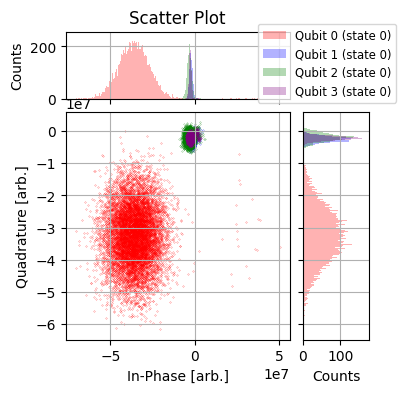

10:39:08 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


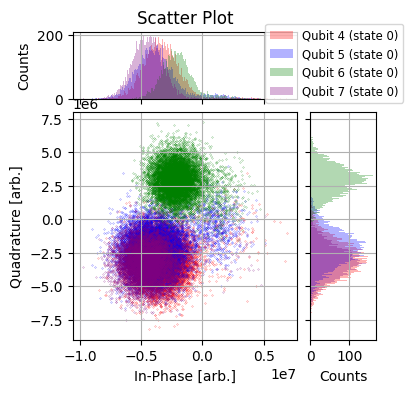

10:39:08 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


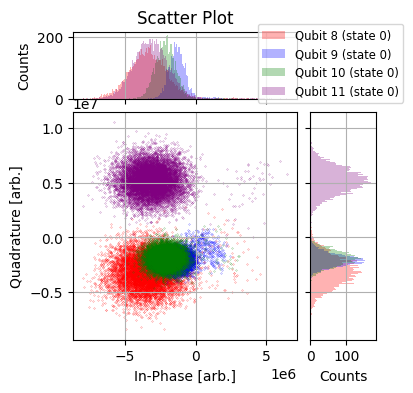

10:39:09 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


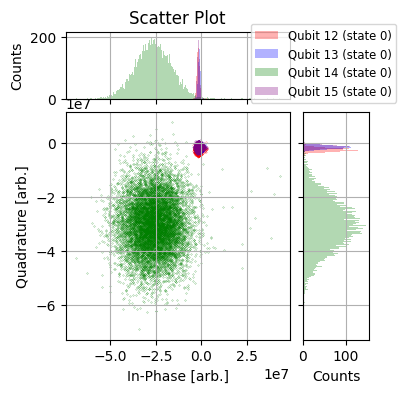

10:39:10 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


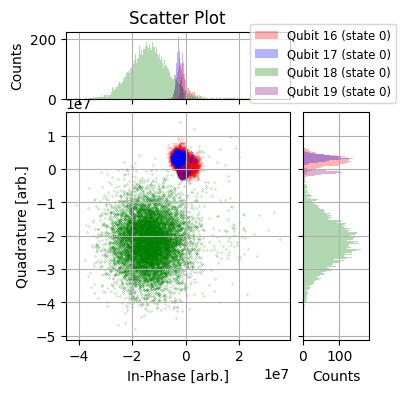

10:39:10 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


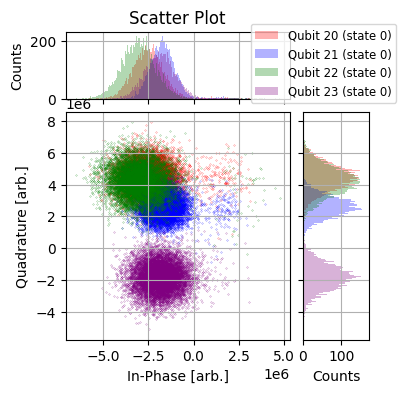

10:39:11 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


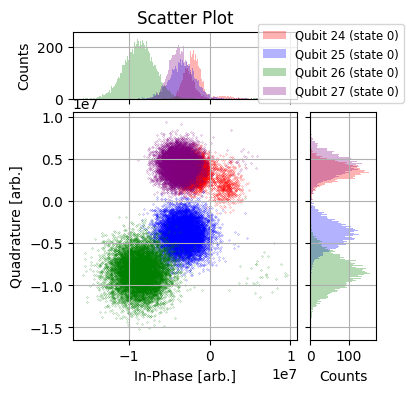

10:39:12 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


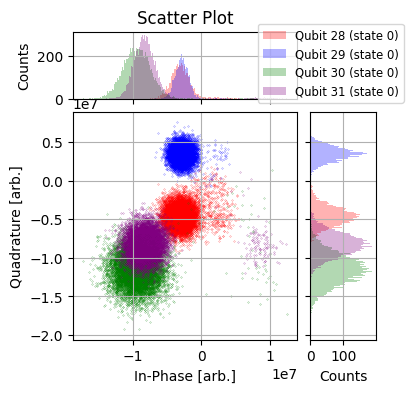

10:39:13 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


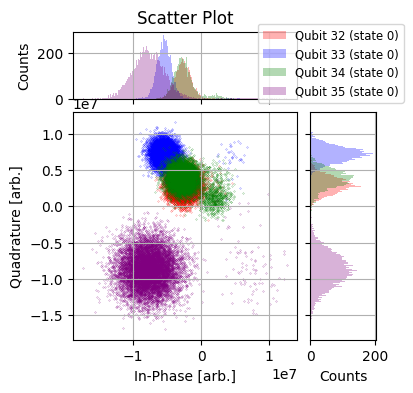

10:39:13 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


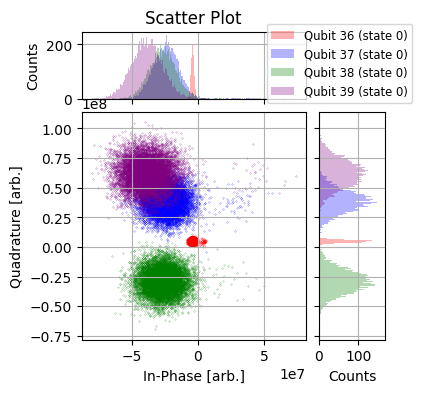

10:39:14 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


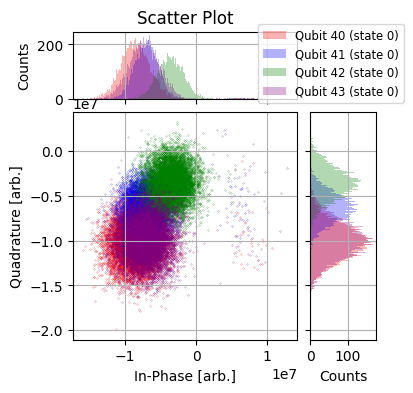

10:39:15 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


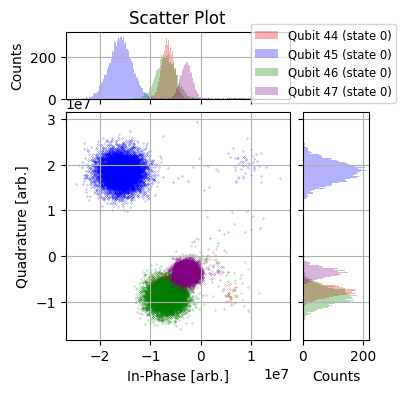

10:39:16 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


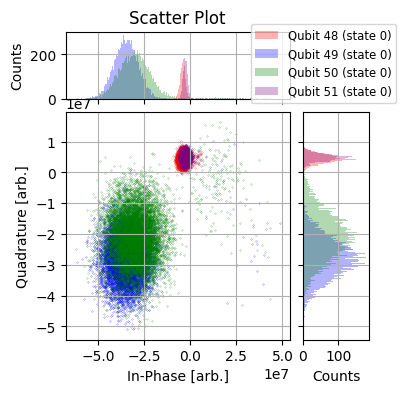

10:39:16 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


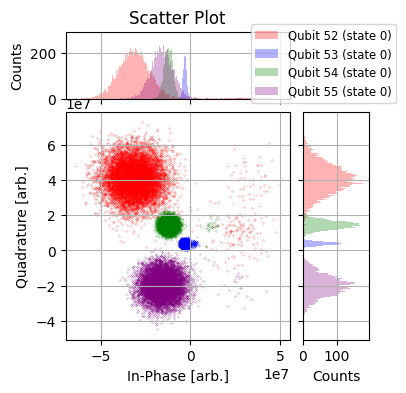

10:39:17 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


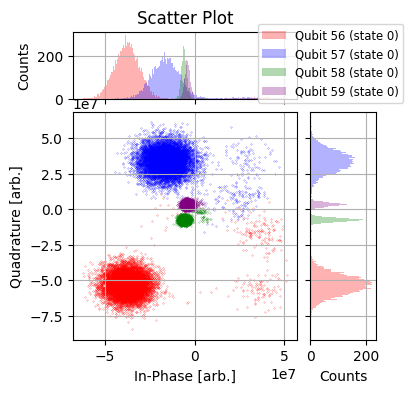

10:39:18 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


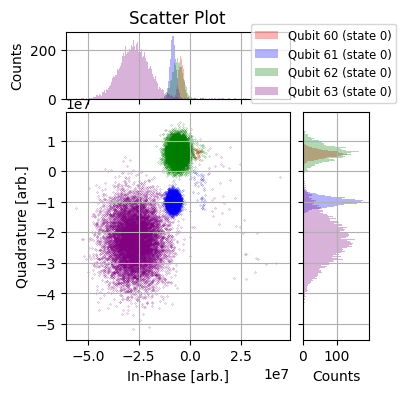

10:39:18 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


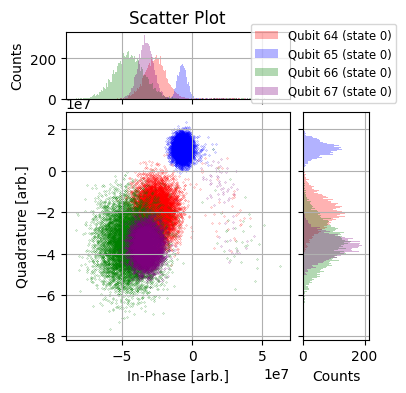

10:39:19 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


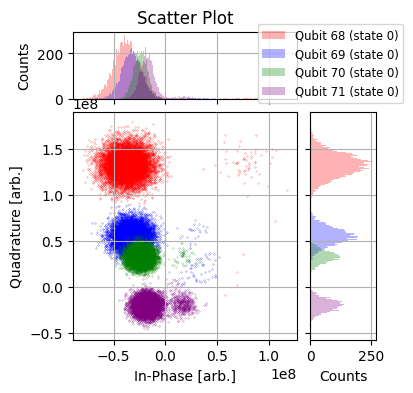

10:39:20 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


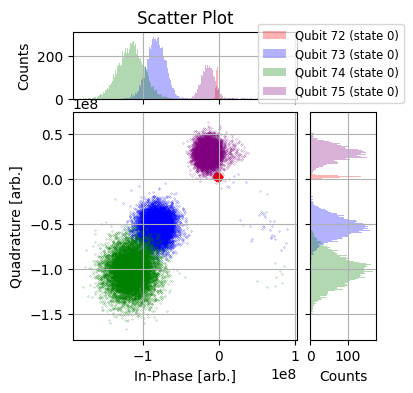

10:39:20 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


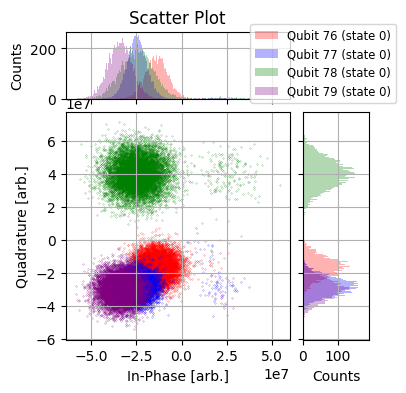

10:39:21 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


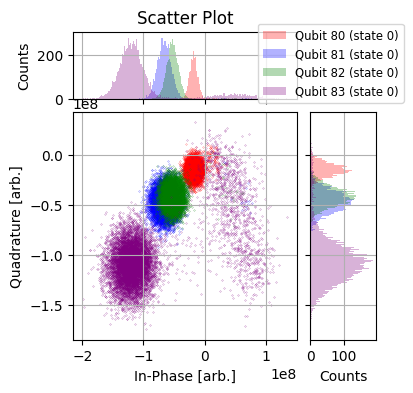

10:39:22 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


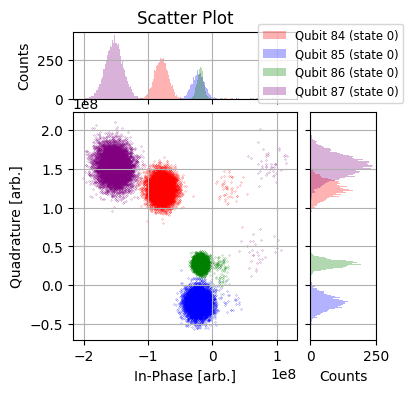

10:39:22 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


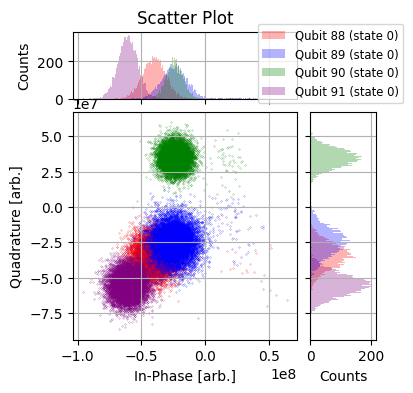

10:39:23 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


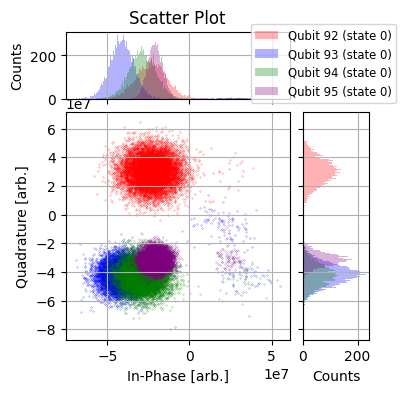

10:39:24 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


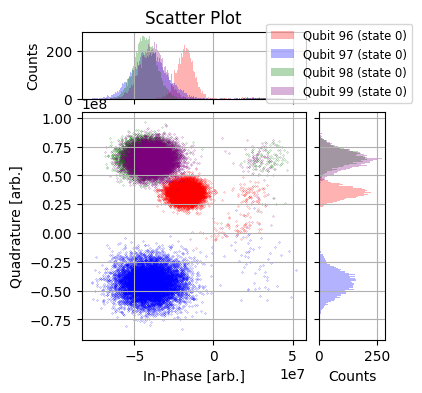

10:39:25 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


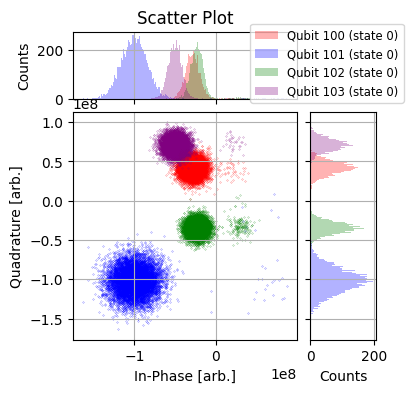

10:39:25 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


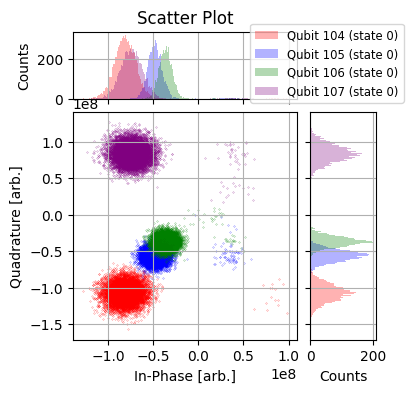

10:39:26 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


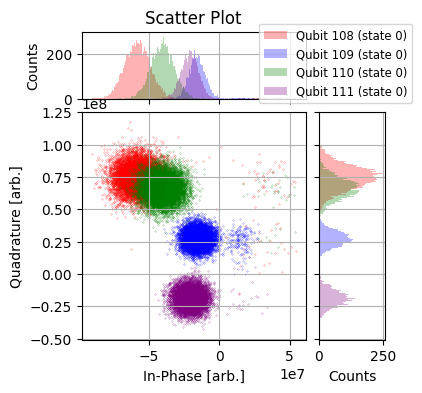

10:39:27 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


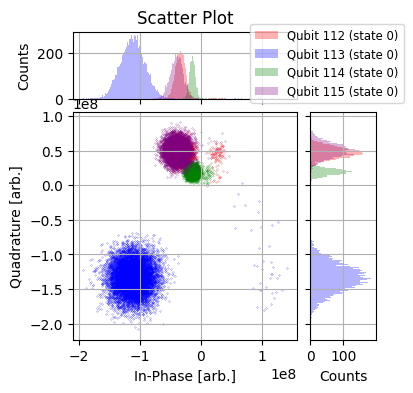

10:39:27 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


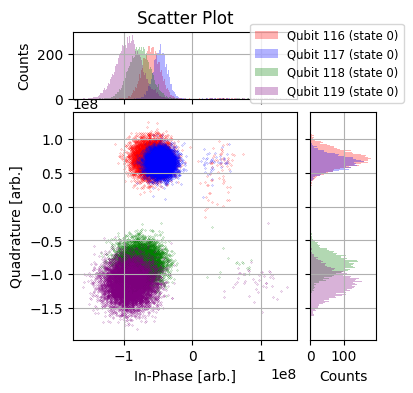

10:39:28 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


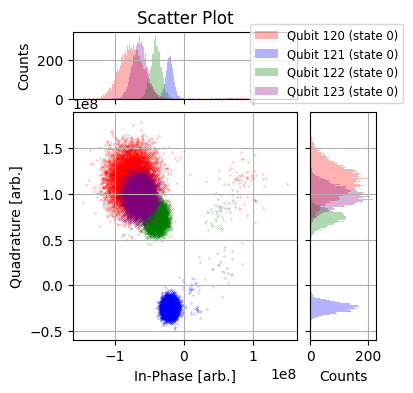

10:39:29 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


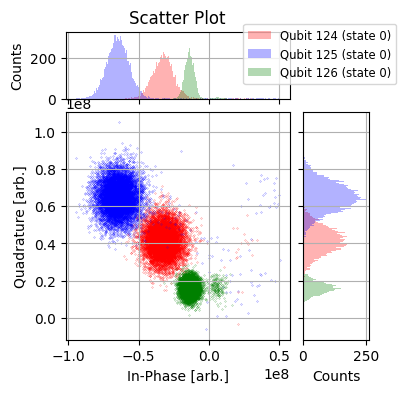

In [6]:
from soft_info import plot_multiple_IQ_data
import numpy as np

data = memories["mmr_0's"]  # Replace with your actual data
n_shots = int(1e4)
n_qubits = data.shape[1]  # Get the number of qubits

# Loop through the data in groups of 4 qubits at a time
for i in range(0, n_qubits, 4):
    upper_bound = min(i + 4, n_qubits)  # Make sure we don't go out of bounds
    data_subset = data[:n_shots, i:upper_bound]
    
    # Create legend labels for these qubits
    labels = [f'Qubit {i+j} (state 0)' for j in range(upper_bound - i)]
    
    plot_multiple_IQ_data([data_subset[:, j] for j in range(data_subset.shape[1])], legend_labels=labels)


10:39:46 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


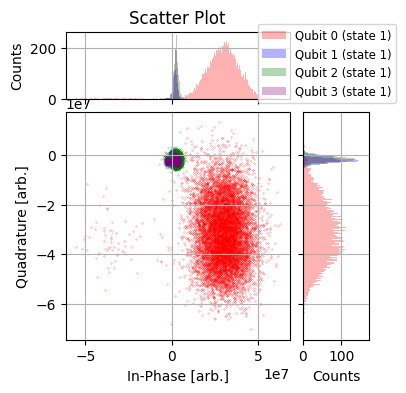

10:39:47 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


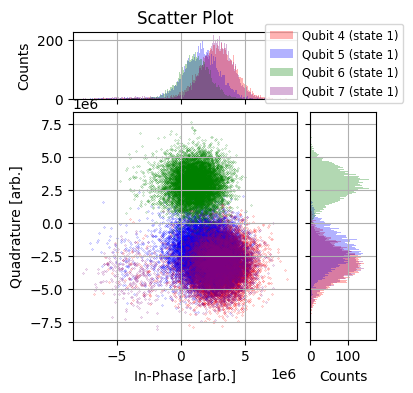

10:39:48 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


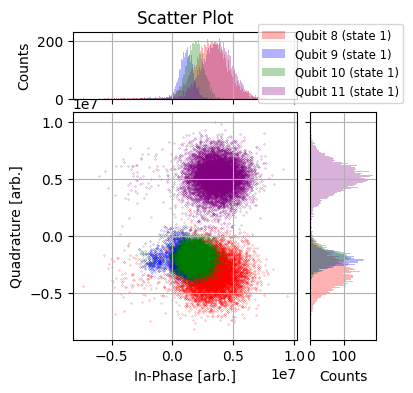

10:39:48 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


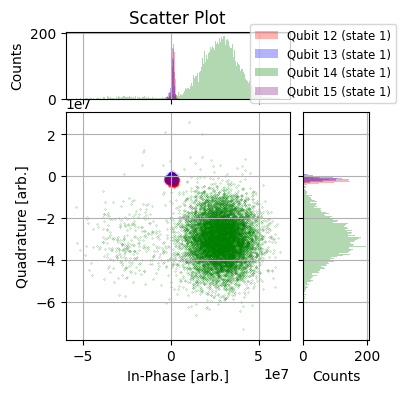

10:39:49 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


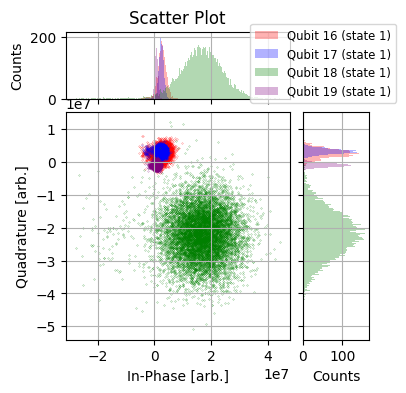

10:39:50 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


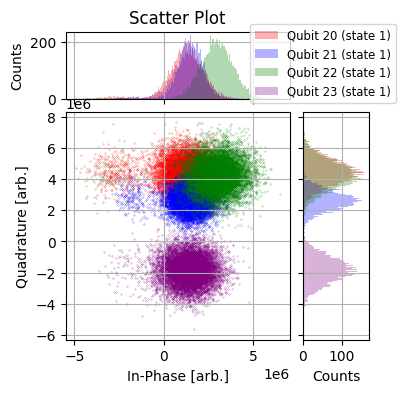

10:39:50 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


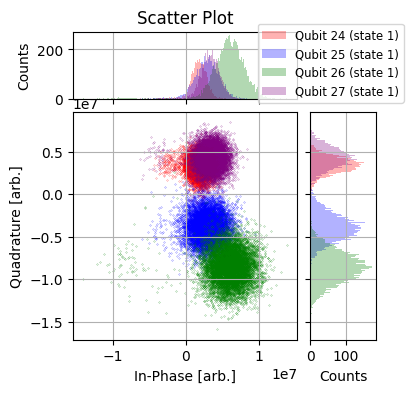

10:39:51 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


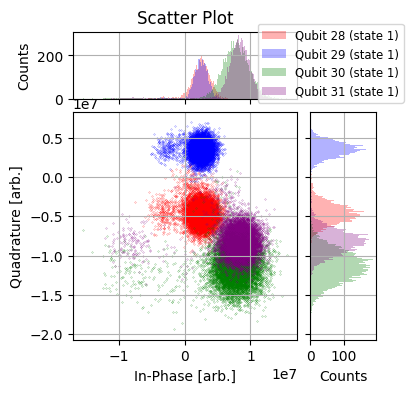

10:39:52 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


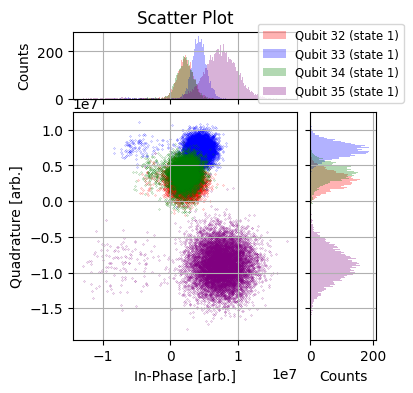

10:39:52 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


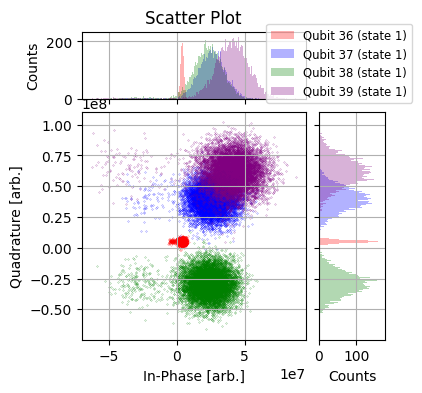

10:39:53 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


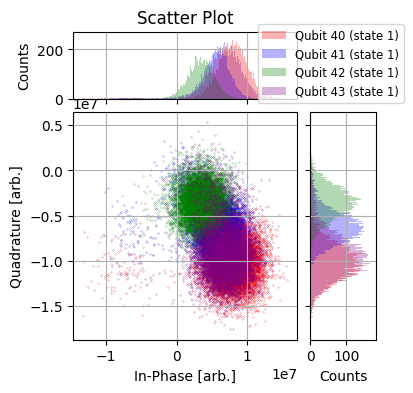

10:39:54 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


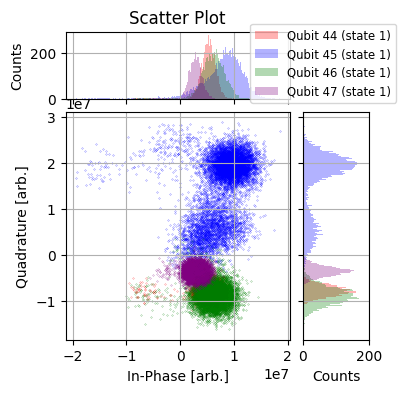

10:39:55 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


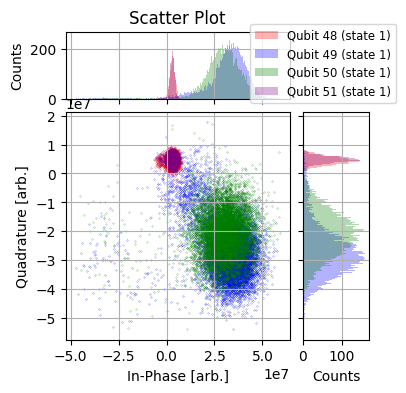

10:39:55 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


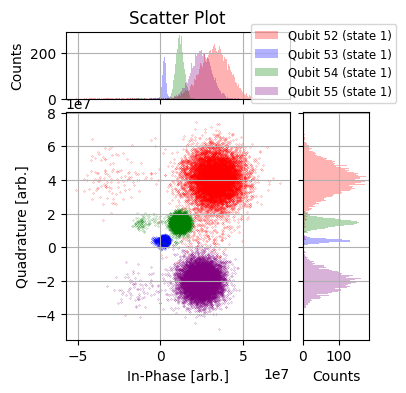

10:39:56 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


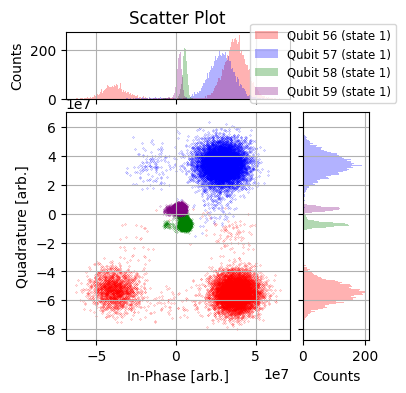

10:39:56 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


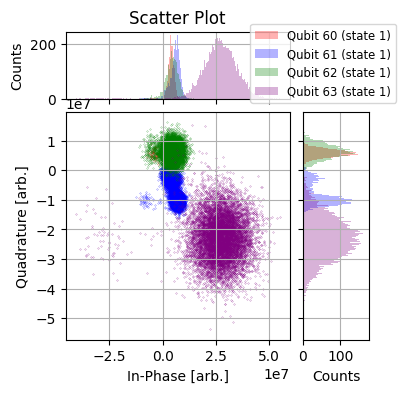

10:39:57 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


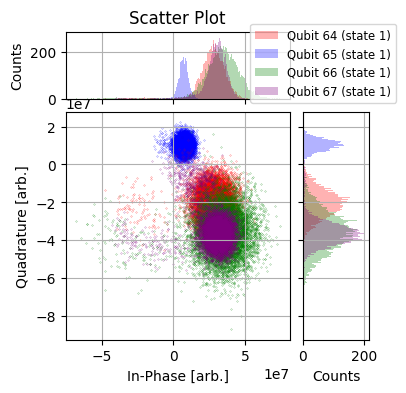

10:39:58 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


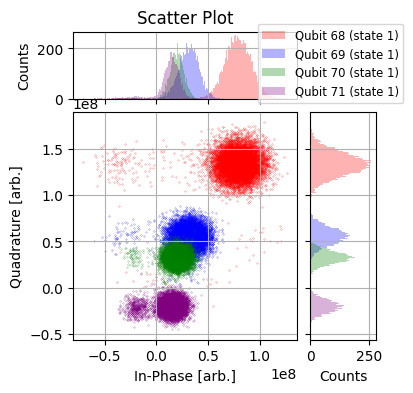

10:39:59 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


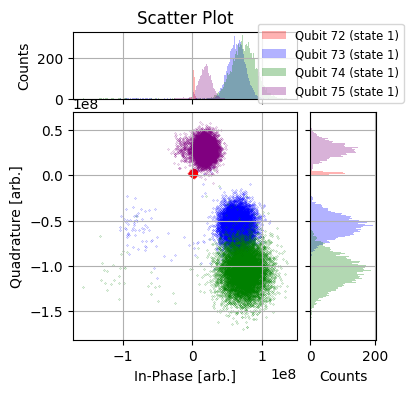

10:39:59 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


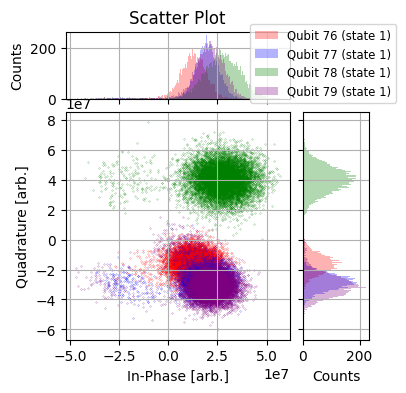

10:40:00 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


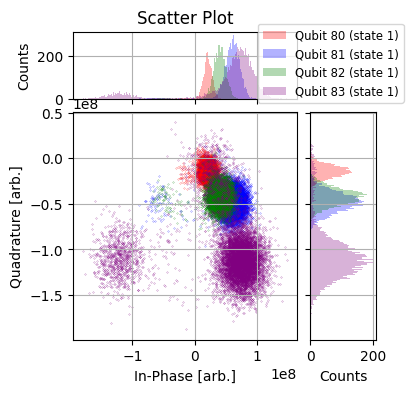

10:40:01 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


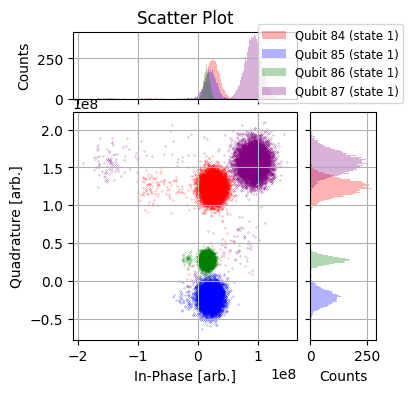

10:40:01 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


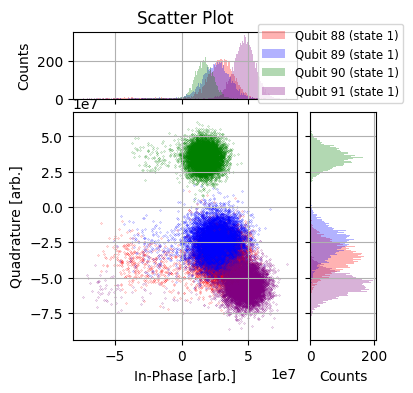

10:40:02 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


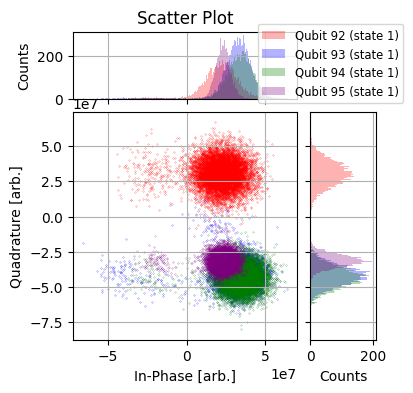

10:40:03 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


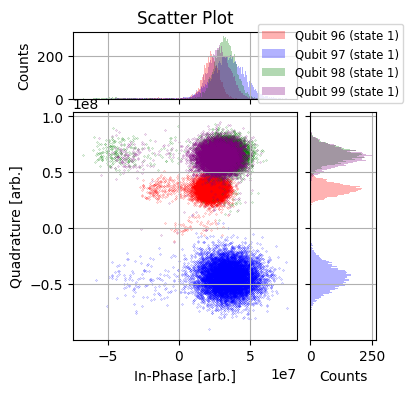

10:40:04 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


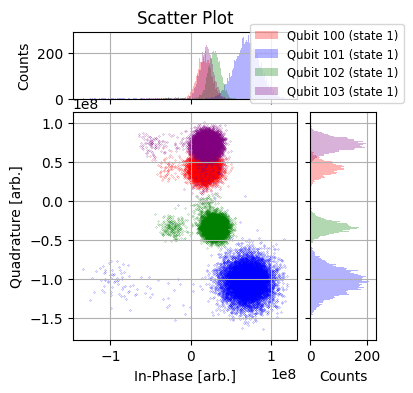

10:40:04 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


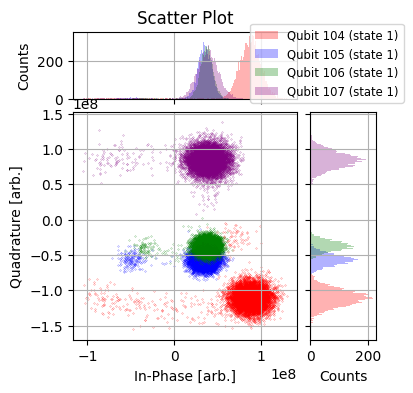

10:40:05 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


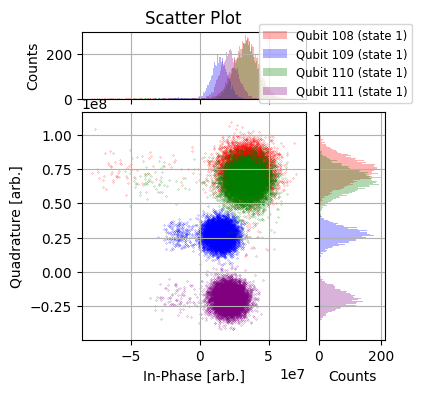

10:40:06 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


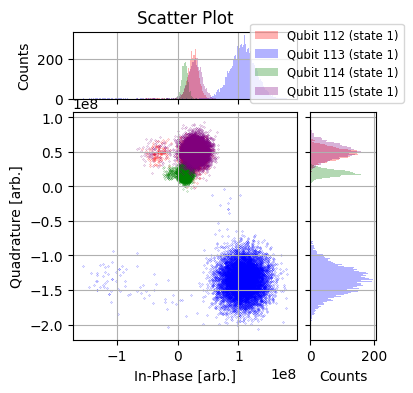

10:40:06 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


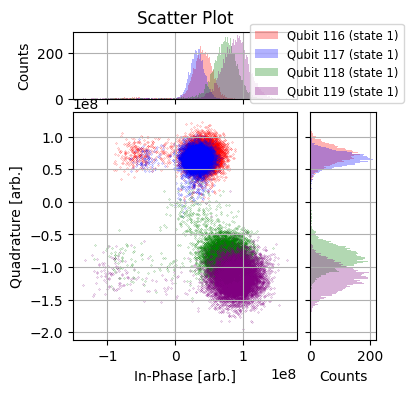

10:40:07 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


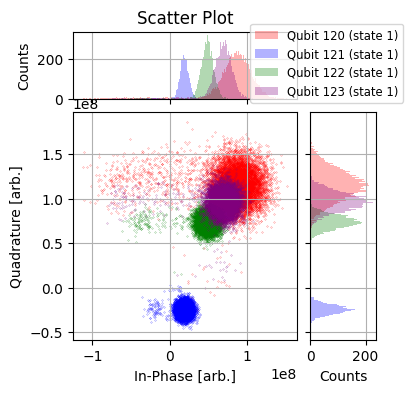

10:40:08 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


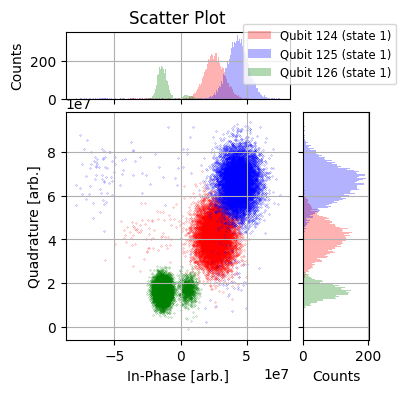

In [7]:
from soft_info import plot_multiple_IQ_data
import numpy as np

data = memories["mmr_1's"]  # Replace with your actual data
n_shots = int(1e4)
n_qubits = data.shape[1]  # Get the number of qubits

# Loop through the data in groups of 4 qubits at a time
for i in range(0, n_qubits, 4):
    upper_bound = min(i + 4, n_qubits)  # Make sure we don't go out of bounds
    data_subset = data[:n_shots, i:upper_bound]
    
    # Create legend labels for these qubits
    labels = [f'Qubit {i+j} (state 1)' for j in range(upper_bound - i)]
    
    plot_multiple_IQ_data([data_subset[:, j] for j in range(data_subset.shape[1])], legend_labels=labels)
